In [1]:
import numpy as np
np.random.seed(0)

In [2]:


def func(val):
    out = np.empty(len(val))
    for i in range(len(val)):
        out[i] = 1. / val[i]
    return out
arr = np.random.randint(1, 10, 10, np.int64)
func(arr)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ,
       0.25      , 0.16666667, 0.33333333, 0.2       , 0.125     ])

In [3]:
big = np.random.randint(1,100,100)
%timeit func(big)
%timeit 1. / big

226 µs ± 3.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.33 µs ± 11.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
a = np.arange(5)
print(a)
b = np.arange(1,6)
print(b)
print(a / b)

[0 1 2 3 4]
[1 2 3 4 5]
[0.         0.5        0.66666667 0.75       0.8       ]


In [5]:
2 ** np.arange(9).reshape([3,3])

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

In [6]:
test_arr = np.arange(1,16)
test_arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [7]:
abs(-test_arr[:, np.newaxis][2] * test_arr)

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45])

In [8]:
(test_arr * 2) - 1

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [9]:
t = np.linspace(0, np.pi, 3)
print(t)

[0.         1.57079633 3.14159265]


In [10]:
np.sin(t)

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

### СОХРАНЯЕМ ПАМЯТЬ 
#### в случае бальших массивов

In [11]:
y = np.zeros(10, dtype=np.int32)
x = np.arange(5)

In [12]:
a = [1, 2, 3]
b = [2, 3, 4]
print(np.subtract(b,a))

[1 1 1]


#### Это хуже

In [13]:
bad_y = y
bad_y[::2] = 2**x
print(bad_y)

[ 1  0  2  0  4  0  8  0 16  0]


#### Чем это

In [14]:
good_y = y
np.power(2, x, out = good_y[::2])
print(good_y)

[ 1  0  2  0  4  0  8  0 16  0]


In [15]:
x = np.arange(1,10, dtype=np.uint64)
print("X: ",x)
print("Y: ", y)
print("Sum Y: ", np.add.reduce(y))
print("Multiply X: ", np.multiply.reduce(x))

X:  [1 2 3 4 5 6 7 8 9]
Y:  [ 1  0  2  0  4  0  8  0 16  0]
Sum Y:  31
Multiply X:  362880


In [16]:
print("Sum: ")
print(np.add.reduce(x))
print(np.add.accumulate(x))
print("Multiply: ")
print(np.multiply.reduce(x))
print(np.multiply.accumulate(x))

Sum: 
45
[ 1  3  6 10 15 21 28 36 45]
Multiply: 
362880
[     1      2      6     24    120    720   5040  40320 362880]


In [17]:
def fact(num):
    res = [1, 1]
    for i in range(2,num):
        res.append(np.add.reduce(res[i - 2: i]))
    return res

In [18]:
fact(20)

[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765]

In [19]:
np.multiply.reduce(np.arange(1,21, dtype = np.uint64))

2432902008176640000

In [20]:
np.subtract.accumulate(np.arange(1,20))

array([   1,   -1,   -4,   -8,  -13,  -19,  -26,  -34,  -43,  -53,  -64,
        -76,  -89, -103, -118, -134, -151, -169, -188], dtype=int32)

In [21]:
x = np.ones((5,5), dtype=np.int32)
print(x.shape)
np.add.reduce(x)

(5, 5)


array([5, 5, 5, 5, 5])

In [22]:
a = np.arange(3)
M = np.ones((2,3))

In [23]:
M + a 

array([[1., 2., 3.],
       [1., 2., 3.]])

### Приближено к 0 (что занчит мы центрозовали массив)

In [24]:
rand_x = np.random.random(10)
Xmean = rand_x.mean(0)
print(Xmean)
rand_x -= Xmean
print(rand_x.mean(0))

0.462304008651507
1.1102230246251566e-17


In [25]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [26]:
import matplotlib.pyplot as plt

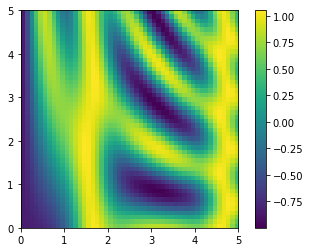

In [27]:
plt.imshow(z, origin="lower", extent=[0,5,0,5], cmap="viridis");
plt.colorbar();

In [28]:
np.shape(z)

(50, 50)

In [29]:
x = np.arange(20)
x = np.reshape(x, (2, 10))
print(x)
x_less = x < 11
print(np.count_nonzero(x_less))
print(np.sum(x_less, axis = 1))


[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
11
[10  1]


In [30]:
np.any(x == 1)

True

In [31]:
np.any(x < 0)

False

## Булевый массив как маска

In [32]:
x[(x > 5) & (x <= 10)]

array([ 6,  7,  8,  9, 10])

In [33]:
summer = (np.arange(365)-172 < 90) & (np.arange(365)-172 > 0)

In [34]:
np.arange(365)[summer]

array([173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
       225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
       238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261])

## Прихотливая индексация 

In [35]:
arr = np.random.randint(200, size=20)
print(arr)

[ 98  62 163 123 195  82 174 148  50 155  14  41  58 193  36  10  86  43
 104  11]


In [36]:
ind = np.array([
    [3, 10],
    [11, 1]
])
print(arr[ind])

[[123  14]
 [ 41  62]]


In [37]:
arr2 = np.arange(1, 17).reshape((4, 4))
arr2

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [38]:
row = np.array([0,2])
col = np.array([3,1])
arr2[row,col]

array([ 4, 10])

### Транслирование
#### Короче, тут массив row будет равен [[0],[2]] и короче фильтр [3,1] применится к каждой и сток 0 и 2!

In [39]:
print(arr2[row[:, np.newaxis], col])
print("------")
print(arr2[2,[1,3]])
print("------")
print(arr2[1:3,[1,3]])

[[ 4  2]
 [12 10]]
------
[10 12]
------
[[ 6  8]
 [10 12]]


In [40]:
mask = np.array([0, 1, 0, 1], dtype = np.bool)
print(arr2[:,mask])

[[ 2  4]
 [ 6  8]
 [10 12]
 [14 16]]


## Почему то не работает  <font color='red'>(потом вернуться)</font> (111 стр.)

### Код:
```python
mean = [0, 0]
cov = [
    [1, 2],
    [2, 5]
]
X = rand.multivariate_normal(mean, cov, 100)
```

## Конец не рабочей области

In [41]:
x = np.arange(10)
i = np.array([4,3,6])
x[i] = 9999
print(x)
x[i] -= 99988
print(x)

[   0    1    2 9999 9999    5 9999    7    8    9]
[     0      1      2 -89989 -89989      5 -89989      7      8      9]


In [42]:
x = np.zeros(6)
print("x =", x)
x[[0, 0]] = [4, 6]
print("modified x is:", x)

x = [0. 0. 0. 0. 0. 0.]
modified x is: [6. 0. 0. 0. 0. 0.]


In [43]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
print("modified x is:", x)
# Для удволетворяющего результата используем
x2 = np.zeros(6)
np.add.at(x2, i, 1)
print("correctly modified x:", x2)

modified x is: [6. 0. 1. 1. 1. 0.]
correctly modified x: [0. 0. 1. 2. 3. 0.]


In [44]:
np.random.seed(42)
x = np.random.randn(100)
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# Ищем интервал для каждого x
# команда ищет индексы для каждого элемента, 
# такие чо если вставить элемент в сортированный массив порядок созраниться
i = np.searchsorted(bins, x) # Добавляем 1 к каждому из интервалов
np.add.at(counts, i, 1)
print(x)
print(i)
print(np.shape(bins))
print(np.shape(counts))

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

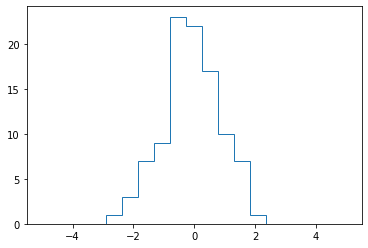

In [45]:
import matplotlib.pyplot as plt

plt.hist(x, bins, histtype = "step")

In [46]:
print(x)
print(bins)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [47]:
# Болле гибкий вариант вычисления диаграммы
np.random.seed(42)
x = np.random.randn(200)
bins = np.linspace(-5, 5, 20)
counts, edges = np.histogram(x, bins)
print(np.shape(counts))
print(edges)

(19,)
[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]


(1000,)


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,
         19.,  43.,  73., 118., 159., 156., 152., 120.,  64.,  51.,  25.,
          9.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
        -18.38383838, -17.97979798, -17.57575758, -17.17171717,
        -16.76767677, -16.36363636, -15.95959596, -15.55555556,
        -15.15151515, -14.74747475, -14.34343434, -13.93939394,
        -13.53535354, -13.13131313, -12.72727273, -12.32323232,
        -11.

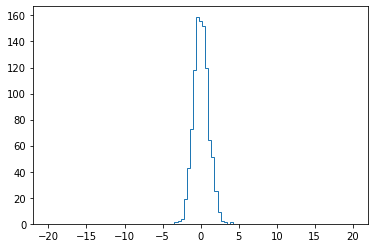

In [48]:
np.random.seed(42)
arr = np.random.randn(1000)
print(np.shape(arr))
bins = np.linspace(-20, 20, 100)
plt.hist(arr, bins, histtype = "step")

## Сортировки

In [49]:
import numpy as np

In [50]:
arr = np.random.randint(10, size=5)
print('Массив до сортировки:', arr)
i = np.argsort(arr)
arr.sort() # Быстрая сортировка
print('Отсортированный массив:', arr)
print('Индексы отсортировнного массива:', i)

Массив до сортировки: [6 0 7 2 5]
Отсортированный массив: [0 2 5 6 7]
Индексы отсортировнного массива: [1 3 4 0 2]


In [51]:
arr2 = np.random.randint(10, size=(4,5))
print(arr2, "\n")
arr2_row = np.sort(arr2, axis = 1)
arr2_col = np.sort(arr2, axis = 0)
print("Отсортированный по строкам массив:\n", arr2_row, "\n")
print("Отсортированный по столбцам массив:\n", arr2_col)

[[8 5 8 6 8]
 [1 7 7 1 3]
 [6 3 3 5 9]
 [5 9 2 8 9]] 

Отсортированный по строкам массив:
 [[5 6 8 8 8]
 [1 1 3 7 7]
 [3 3 5 6 9]
 [2 5 8 9 9]] 

Отсортированный по столбцам массив:
 [[1 3 2 1 3]
 [5 5 3 5 8]
 [6 7 7 6 9]
 [8 9 8 8 9]]


In [52]:
k_smallest = np.random.randint(100, size = 20)
print(k_smallest)
np.partition(k_smallest, 4) # значит выбрать 4 наименьших значения из массива

[13 74 81 11 86 11 12 24 44 18 54 99 44  7 92 52 54 31 50 43]


array([11,  7, 11, 12, 13, 18, 86, 24, 44, 74, 54, 99, 44, 81, 92, 52, 54,
       31, 50, 43])

In [53]:
k_smallest2 = np.random.randint(100, size = (5, 5))
n = 2
print(k_smallest2, '\n')
new_arr = np.partition(k_smallest2, n, axis = 1) # значит выбрать 2 наименьших значений каждой строки
print('Здесь в каждой строке первые n членов являются наименьшими:\n\n', new_arr, '\n')
new_arr = new_arr[:,:n]
new_arr = np.reshape(new_arr, np.prod(np.shape(new_arr)))
print('Здесь же я отделил их от масива сформировав массив n наименьших элементов каждой строки\n', new_arr)

[[81 69 17 82 21]
 [36 95 55 58  2]
 [27 73 34 60 92]
 [53 62 78 96  6]
 [75 48 93 84 30]] 

Здесь в каждой строке первые n членов являются наименьшими:

 [[17 21 69 82 81]
 [ 2 36 55 58 95]
 [27 34 60 73 92]
 [ 6 53 62 96 78]
 [30 48 75 84 93]] 

Здесь же я отделил их от масива сформировав массив n наименьших элементов каждой строки
 [17 21  2 36 27 34  6 53 30 48]


# К-близжайших соседей

In [54]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn; seaborn.set()

[[0.41590737 0.84624529]
 [0.62876482 0.7353503 ]
 [0.76772389 0.50484488]
 [0.54330052 0.51399587]
 [0.58805838 0.02939445]]


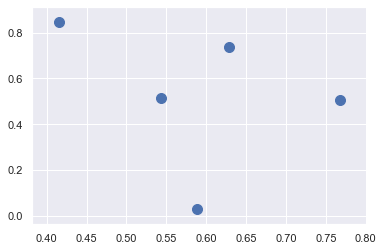

In [55]:
K = 1
X = np.random.rand(5, 2)
print(X)

plt.scatter(X[:,0],X[:,1], s=100)

In [56]:
# hard way: dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis = 1)
diff = X[:,np.newaxis,:] - X[np.newaxis,:,:]
sq_diff = diff ** 2
dist_sq = sq_diff.sum(-1) # пометка! 
print(dist_sq)

[[0.         0.05760599 0.24032911 0.1266187  0.69688128]
 [0.05760599 0.         0.07244237 0.05630193 0.50003068]
 [0.24032911 0.07244237 0.         0.05044959 0.25833281]
 [0.1266187  0.05630193 0.05044959 0.         0.2368418 ]
 [0.69688128 0.50003068 0.25833281 0.2368418  0.        ]]



> <b style="color: Crimson">ПОМЕТКА</b>
> 1. Если ось отрицательна np.sum будет брать от **последней до прервой оси**
> 1. **sq_diff.shape** вернет (10, 10, 2) - тут будт оси 0, 1, 2. 
> 1. Это значит, что в это случае '-1' - он возмет последнюю, то есть *2*
>

In [57]:
dist_sq.diagonal() # (вернет диоганальные элементы)
# Это значит что диоганальные элементы равны нулю (то есть все идет по плану)

array([0., 0., 0., 0., 0.])

In [58]:
nearest= np.argpartition(dist_sq, 2, axis = 1)
print(nearest)

[[0 1 3 2 4]
 [1 3 0 2 4]
 [2 3 1 0 4]
 [3 2 1 0 4]
 [4 3 2 1 0]]


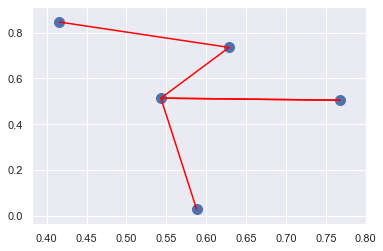

In [59]:
plt.scatter(X[:, 0],X[:, 1], s = 100)
for i in range(X.shape[0]):
    for j in nearest[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='red')

## Структурированные данные

In [60]:
name = ['Nikita', 'Roma', 'Vlad', 'Egor', 'Nikita']
age = np.array([25, 31, 37, 19, 12], dtype=np.int64)
weight = [55., 85.5, 68., 61.5, 14.]

data = np.zeros(5, dtype={'names':('name', 'age', 'weight'),
                      'formats':('U10', 'i4', 'f8')})
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)
print("\nСписок имен людей старше 30 лет:")
print(data[data['age'] > 30]['name'])
data[data['age'] > 30]['weight'] = 0.
print(data)

[('Nikita', 25, 55. ) ('Roma', 31, 85.5) ('Vlad', 37, 68. )
 ('Egor', 19, 61.5) ('Nikita', 12, 14. )]

Список имен людей старше 30 лет:
['Roma' 'Vlad']
[('Nikita', 25, 55. ) ('Roma', 31, 85.5) ('Vlad', 37, 68. )
 ('Egor', 19, 61.5) ('Nikita', 12, 14. )]


>  ## <b style="color: red">НО</b>
> *Можно использовать заготовленный массив типов*
> ### Запись:
> np.dtype([('name', 'U20'),('age', 'i4'),('weight', 'f8')]) 
> ### Вернет: 
> [( '**name**', '**<U20**' ), ( '**age**', '**<i4**' ), ( '**weight**', '**<f8**' )]

In [61]:
types = np.dtype([('name', 'U20'),('age', 'i4'),('weight', 'f8')])
print(types, '\n')
new_arr = np.zeros(5,dtype = types)
new_arr['name'] = name
new_arr['age'] = age
new_arr['weight'] = weight
print(new_arr)

[('name', '<U20'), ('age', '<i4'), ('weight', '<f8')] 

[('Nikita', 25, 55. ) ('Roma', 31, 85.5) ('Vlad', 37, 68. )
 ('Egor', 19, 61.5) ('Nikita', 12, 14. )]


In [62]:
np.dtype('S10, i8, f8') # можно и без названий

dtype([('f0', 'S10'), ('f1', '<i8'), ('f2', '<f8')])

In [63]:
new_type = np.dtype([('id', 'i8'), ('mat', 'f8', (3,3))])
X = np.zeros(1, dtype = new_type)
print(X)
X['mat'][0] = np.ones((3,3), dtype=np.float64)
print(X)

[(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])]
[(0, [[1., 1., 1.], [1., 1., 1.], [1., 1., 1.]])]


> ### Однако есть еще **структурированные массивы**
> Которые предоставляют доступ к элементам с помощью ".", но работает заметно медленее

In [64]:
data_rec = data.view(np.recarray)
print(data_rec.age)

[25 31 37 19 12]
